# Unsupervised ML (Clustering)

<b>CONSIDERING THE DATABASES THAT CONTAINS THE DISTRICTS !!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
district_wise=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [4]:
district_wise

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,2575
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,3365
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,4692
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,1849
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,4551
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,1,0,1,0,0,0,4,104,287,341
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,1792,7,139,129,378,0,369,2426,7848,5804
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,3137,24,118,27,746,0,409,1512,11831,12046
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,85,6,56,0,56,67,...,1392,62,414,81,224,0,322,1726,5811,3973
9,ANDHRA PRADESH,KHAMMAM,2001,93,60,1,47,0,47,41,...,1026,17,180,336,172,0,209,1450,4582,2871


 Unnecessary Columns are removing from the dataset

In [6]:
district_wise=district_wise[['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'RAPE',
 'KIDNAPPING & ABDUCTION',
 'DACOITY',
 'ROBBERY',
 'BURGLARY',
 'RIOTS',
 'COUNTERFIETING',
 'ARSON']]

In [7]:
for i in range(len(district_wise['STATE/UT'])):
    if(district_wise['STATE/UT'][i]=='DELHI UT'):
        district_wise['STATE/UT'][i]='DELHI'
        

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
district_wise['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [9]:
district_wise=district_wise[district_wise['DISTRICT']!='TOTAL']

In [11]:
districtwise_sc=pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")

In [12]:
districtwise_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [13]:
districtwise_sc['TOTAL CRIMES AGAINST SC']=districtwise_sc.iloc[:,3:].sum(axis=1)

In [14]:
districtwise_sctot=districtwise_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]

In [15]:
districtwise_sctot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0
6,ANDHRA PRADESH,GUNTUR,2001,141
7,ANDHRA PRADESH,HYDERABAD CITY,2001,79
8,ANDHRA PRADESH,KARIMNAGAR,2001,156
9,ANDHRA PRADESH,KHAMMAM,2001,161


In [16]:
districtwise_sctot=districtwise_sctot[districtwise_sctot['DISTRICT']!='TOTAL']

In [18]:
districtwise_st=pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [19]:
districtwise_st['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [20]:
districtwise_st=districtwise_st[districtwise_st['DISTRICT']!='TOTAL']

In [21]:
districtwise_st['TOTAL CRIMES AGAINST ST']=districtwise_st.iloc[:,3:].sum(axis=1)

In [22]:
districtwise_sttot=districtwise_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]

In [23]:
districtwise_sttot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0
6,ANDHRA PRADESH,GUNTUR,2001,35
7,ANDHRA PRADESH,HYDERABAD CITY,2001,2
8,ANDHRA PRADESH,KARIMNAGAR,2001,17
9,ANDHRA PRADESH,KHAMMAM,2001,42


In [24]:
districtwise_child=pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")

In [25]:
districtwise_child['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [26]:
districtwise_child=districtwise_child[districtwise_child['DISTRICT']!='TOTAL']

In [27]:
districtwise_child.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [28]:
districtwise_child.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes',
       'TOTAL CRIMES AGAINST CHILDREN'],
      dtype='object')

In [29]:
districtwise_childtot=districtwise_child[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]

In [30]:
districtwise_childtot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0
6,ANDHRA PRADESH,GUNTUR,2001,0
7,ANDHRA PRADESH,HYDERABAD CITY,2001,25
8,ANDHRA PRADESH,KARIMNAGAR,2001,9
9,ANDHRA PRADESH,KHAMMAM,2001,0


In [31]:
districtwise_women=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [32]:
districtwise_women['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [33]:
districtwise_women=districtwise_women[districtwise_women['DISTRICT']!='TOTAL']

In [34]:
districtwise_women['TOTAL CRIMES AGAINST WOMEN']=districtwise_women.iloc[:,3:].sum(axis=1)

In [35]:
districtwise_womentot=districtwise_women[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]

In [36]:
districtwise_womentot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,1
6,ANDHRA PRADESH,GUNTUR,2001,758
7,ANDHRA PRADESH,HYDERABAD CITY,2001,991
8,ANDHRA PRADESH,KARIMNAGAR,2001,886
9,ANDHRA PRADESH,KHAMMAM,2001,782


<B> MERGING THE ABOVE DATASETS!!<BR>

In [38]:
cluster=pd.merge(district_wise,districtwise_sctot,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_sttot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_childtot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_womentot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])

<B> GROUPING BY STATE/UT,DISTRICT AND SUMMING ALL THE CRIMES OVER THE YEARS!!

In [39]:
cluster=cluster.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['YEAR'],axis=1)

In [40]:
cluster

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,15,3,12,5,9,90,17,1,11,2007,0,1,10,54
1,A & N ISLANDS,ANDAMAN,118,92,73,4,63,708,115,9,80,20059,0,33,206,458
2,A & N ISLANDS,CAR,2,0,1,1,0,0,0,0,0,2012,0,0,2,2
3,A & N ISLANDS,NICOBAR,12,2,1,1,0,23,0,0,3,20059,0,3,1,11
4,A & N ISLANDS,NORTH,5,4,0,0,1,6,0,0,0,2012,0,0,7,9
5,A & N ISLANDS,SOUTH,8,8,7,4,1,65,8,1,4,2012,0,4,19,36
6,ANDHRA PRADESH,ADILABAD,1186,672,754,72,237,2519,1016,33,395,24078,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,1922,266,839,137,244,2536,1293,114,444,24078,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,1270,368,907,96,207,2777,973,171,419,24078,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,1196,298,653,39,106,1549,1326,48,337,24078,1537,128,574,5002


## 4.1  CLUSTERING USING THE KMEANS!!

In [41]:
x=cluster.iloc[:,2:]

In [42]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=0)

In [43]:
y_kmeans=kmeans.fit_predict(x)

## 4.2  Create DataFrame for each cluster that shows data according to the areas.

## 1 SENSITIVE Area's!!<BR>

In [44]:
sensitive_regions=cluster[y_kmeans==2]

In [45]:
sensitive_regions

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,1186,672,754,72,237,2519,1016,33,395,24078,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,1922,266,839,137,244,2536,1293,114,444,24078,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,1270,368,907,96,207,2777,973,171,419,24078,1393,14,345,8004
10,ANDHRA PRADESH,CYBERABAD,1810,641,1398,141,765,11946,559,88,491,20075,1657,341,296,15411
11,ANDHRA PRADESH,EAST GODAVARI,1041,499,780,30,245,5069,768,225,479,24078,2042,223,213,9514
13,ANDHRA PRADESH,GUNTUR,1775,526,969,91,347,3509,1204,214,692,24078,1831,354,709,12390
15,ANDHRA PRADESH,HYDERABAD CITY,1455,712,1466,121,942,13435,2432,311,433,24078,1293,76,872,19685
16,ANDHRA PRADESH,KARIMNAGAR,1674,853,1534,91,344,3258,2011,62,685,24078,3331,505,2406,16110
17,ANDHRA PRADESH,KHAMMAM,1337,721,919,63,195,2717,1667,69,439,24078,858,623,759,10518
18,ANDHRA PRADESH,KRISHNA,842,528,650,22,126,2392,468,88,545,24078,1973,248,879,10742


## 2 MODERATE Area's!!<BR>

In [46]:
moderate_regions=cluster[y_kmeans==1]

In [47]:
moderate_regions

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,15,3,12,5,9,90,17,1,11,2007,0,1,10,54
2,A & N ISLANDS,CAR,2,0,1,1,0,0,0,0,0,2012,0,0,2,2
4,A & N ISLANDS,NORTH,5,4,0,0,1,6,0,0,0,2012,0,0,7,9
5,A & N ISLANDS,SOUTH,8,8,7,4,1,65,8,1,4,2012,0,4,19,36
14,ANDHRA PRADESH,GUNTUR URBAN,150,69,100,6,62,416,23,14,33,6033,139,24,127,1955
26,ANDHRA PRADESH,RAJAHMUNDRY,65,38,75,4,27,354,12,7,12,6033,220,13,68,809
30,ANDHRA PRADESH,TIRUPATHI URBAN,112,32,72,4,40,487,84,7,21,6033,213,36,48,513
31,ANDHRA PRADESH,VIJAYAWADA,213,134,374,18,204,3101,62,57,119,10015,753,153,159,5295
38,ANDHRA PRADESH,WARANGAL URBAN,108,82,124,3,41,475,200,3,55,6033,201,29,66,1305
40,ARUNACHAL PRADESH,ANJAW,3,1,1,0,0,11,1,0,0,8042,0,0,0,4


## 3 Peaceful Area's!!<BR>

In [48]:
peaceful_regions=cluster[y_kmeans==0]

In [49]:
peaceful_regions

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
1,A & N ISLANDS,ANDAMAN,118,92,73,4,63,708,115,9,80,20059,0,33,206,458
3,A & N ISLANDS,NICOBAR,12,2,1,1,0,23,0,0,3,20059,0,3,1,11
9,ANDHRA PRADESH,CUDDAPAH,1196,298,653,39,106,1549,1326,48,337,24078,1537,128,574,5002
12,ANDHRA PRADESH,GUNTAKAL RLY.,75,3,10,15,31,0,4,66,2,24078,7,0,7,57
27,ANDHRA PRADESH,RANGA REDDY,1091,338,450,66,213,3266,392,16,452,24078,966,230,78,3987
28,ANDHRA PRADESH,SECUNDERABAD RLY.,104,7,9,8,54,6,16,169,2,24078,9,2,1,53
29,ANDHRA PRADESH,SRIKAKULAM,405,274,217,24,66,1437,469,53,295,24078,1200,160,146,4657
33,ANDHRA PRADESH,VIJAYAWADA RLY.,32,4,9,7,34,2,14,99,1,24078,12,1,9,73
34,ANDHRA PRADESH,VISAKHA RURAL,737,228,191,20,66,1241,787,43,270,24078,898,162,57,3474
36,ANDHRA PRADESH,VIZIANAGARAM,412,223,177,27,66,1376,181,57,114,24078,667,94,193,4724


## 4.3.3  "Analyse your clusters and prepare a report that explains all your observations

<B> 10 MOST SAFE AREAS!!

In [50]:
peaceful_regions['OVERALL CRIME']=peaceful_regions.iloc[:,2:].sum(axis=1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
peaceful_regions.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

In [53]:
peaceful_regions.head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,DELHI,IGI AIRPORT,8,1,35,1,21,5,3,6,0,16068,3,0,14,50,16215
1,ASSAM,CHIRANG,214,199,281,51,55,265,184,8,82,16068,0,0,0,952,18359
2,RAJASTHAN,G.R.P.,44,11,40,15,61,20,57,11,4,18045,28,5,89,178,18608
3,ASSAM,UDALGURI,325,219,395,71,101,421,189,11,127,16068,0,28,0,939,18894
4,PUNJAB,FEROZPUR,409,222,229,8,24,950,0,49,59,16068,35,0,140,906,19099
5,CHHATTISGARH,DANTEWARA,598,103,67,79,23,439,148,2,71,18051,15,71,126,298,20091
6,HARYANA,MEWAT,167,264,193,98,119,300,892,9,36,16068,55,0,190,1706,20097
7,A & N ISLANDS,NICOBAR,12,2,1,1,0,23,0,0,3,20059,0,3,1,11,20116
8,ARUNACHAL PRADESH,UPPER DIBANG VALLEY,12,0,2,0,2,32,5,0,0,20075,0,1,1,2,20132
9,ARUNACHAL PRADESH,K/KUMEY,41,17,17,6,4,55,4,0,5,20075,0,26,4,37,20291


<B> 10 MOST  SENSITIVE AREAS!!

In [54]:
sensitive_regions['OVERALL CRIME']=sensitive_regions.iloc[:,2:].sum(axis=1)

In [55]:
sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

In [56]:
sensitive=sensitive_regions.reset_index().drop(['index'],axis=1).head(10)

In [57]:
sensitive

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,KARNATAKA,BANGALORE COMMR.,2831,642,3014,529,6740,19968,4665,772,48,24078,1423,16,675,9010,74411
1,ANDHRA PRADESH,HYDERABAD CITY,1455,712,1466,121,942,13435,2432,311,433,24078,1293,76,872,19685,67311
2,WEST BENGAL,24 PARGANAS SOUTH,2114,2221,2209,194,392,556,8893,41,129,24078,7,0,238,25115,66187
3,WEST BENGAL,24 PARGANAS NORTH,2329,1883,3311,248,739,387,5484,129,140,24078,22,21,1435,24376,64582
4,WEST BENGAL,MURSHIDABAD,1644,3352,2943,152,391,114,3143,281,248,24078,13,13,923,27004,64299
5,GUJARAT,AHMEDABAD COMMR.,1204,506,2301,471,5292,9392,2434,146,79,24078,798,41,1435,14973,63150
6,MAHARASHTRA,PUNE COMMR.,1317,846,1087,309,3667,13165,6489,241,224,24078,193,3,3391,6283,61293
7,BIHAR,PATNA,4586,572,3502,951,4901,6855,5948,121,284,24078,1503,33,893,5931,60158
8,MADHYA PRADESH,INDORE,1339,1255,625,73,2326,11729,1616,59,507,24078,1139,421,4401,10392,59960
9,UTTAR PRADESH,LUCKNOW,1828,689,2914,186,1532,6663,2909,274,67,24078,2482,22,1251,12679,57574


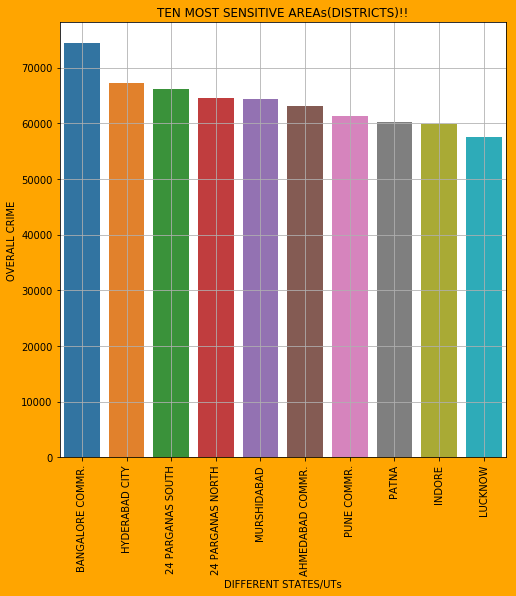

In [59]:
plt.figure(figsize=(8,8),facecolor='orange')
sns.barplot(x=sensitive['DISTRICT'],y=sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("TEN MOST SENSITIVE AREAs(DISTRICTS)!!")
plt.grid()
plt.show()

## 4.3.1  What is impacting more crimes in sensitive areas?

In [60]:
sensitive_reg=sensitive_regions.reset_index().drop(['index'],axis=1).head(50)

<Figure size 1800x6480 with 0 Axes>

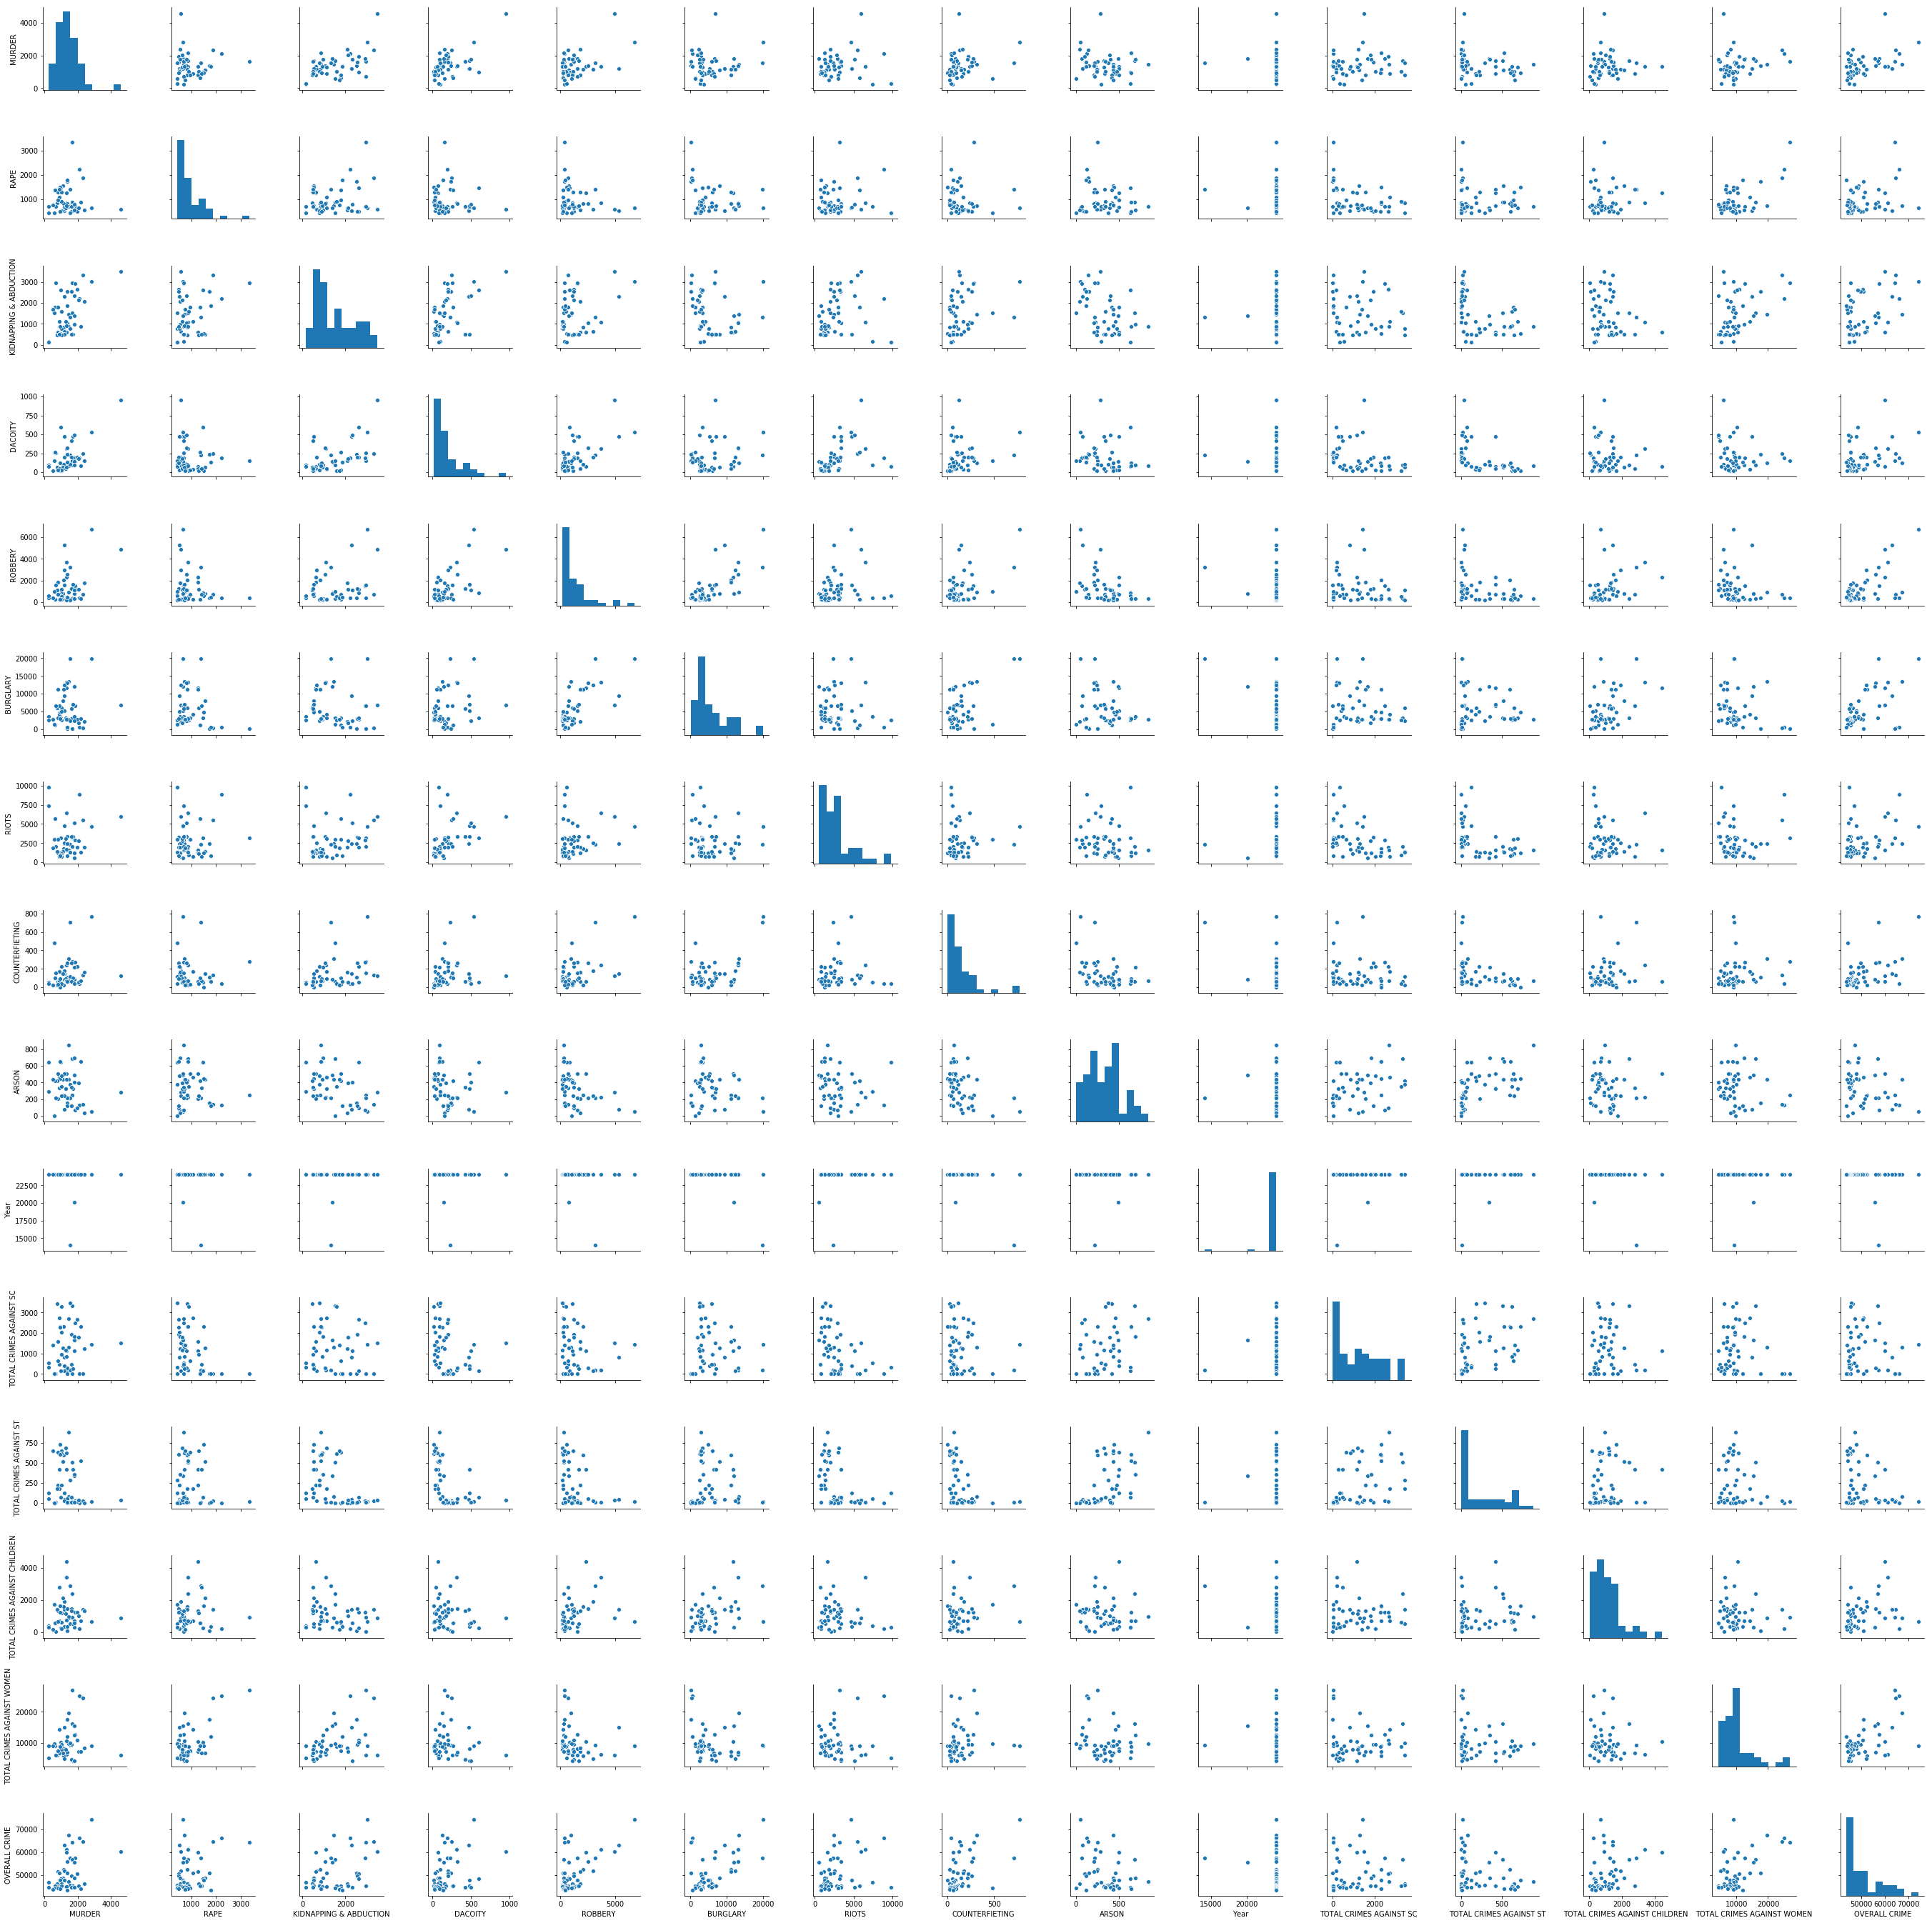

In [61]:
plt.figure(figsize=(25,90))
sns.pairplot(sensitive_reg)
plt.xticks(size=20)
plt.show()

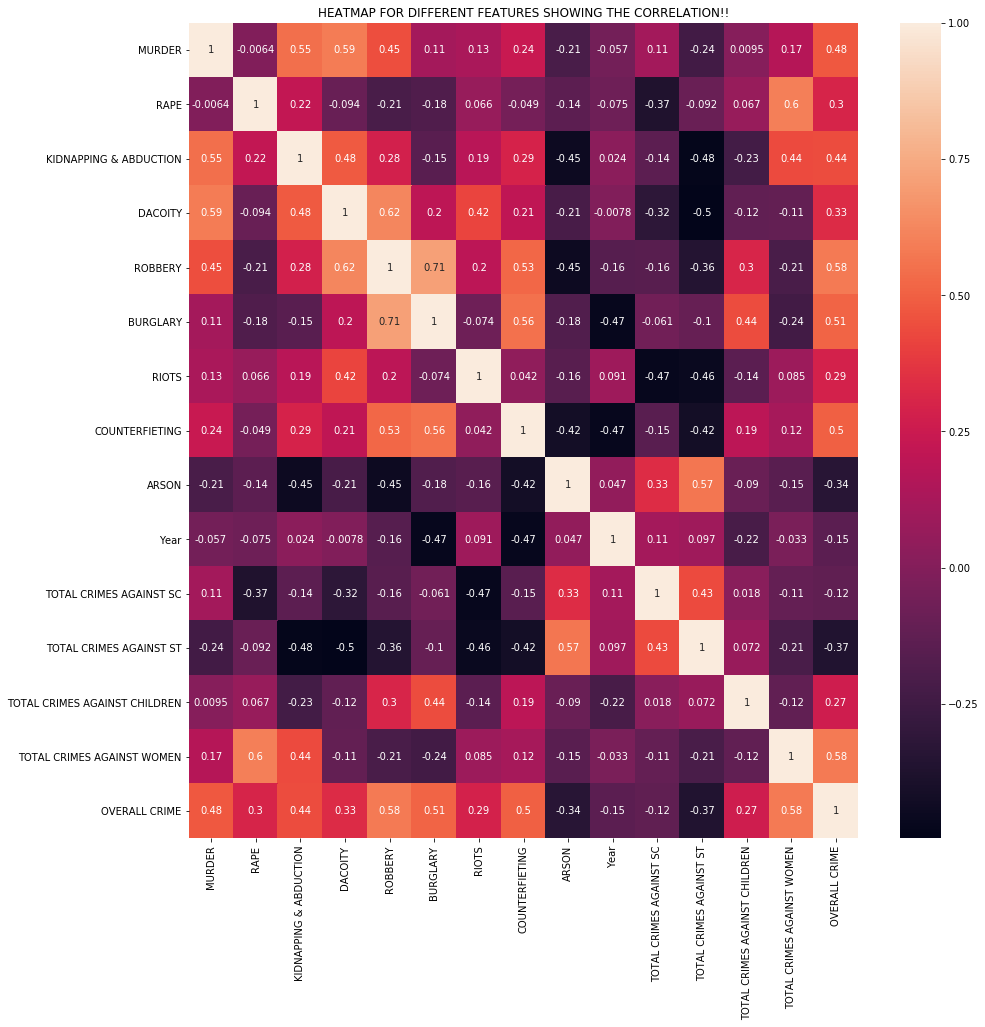

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(sensitive_reg.iloc[:,2:].corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()

##  4.3.2 What needs to be done to reduce crime.

Reducing crime in India is a complex and multifaceted issue that requires a coordinated effort from various stakeholders, including the government, law enforcement agencies, civil society organizations, and the general public. Here are some measures that can help reduce crime in India:<BR><BR>
Strengthen law enforcement: The government needs to allocate more resources and funds to law enforcement agencies to improve their capacity to prevent and investigate crimes. Police reforms should be implemented to make the force more accountable, efficient, and effective.<BR><BR>
Address socio-economic factors: Poverty, unemployment, and lack of education are significant contributors to crime. The government needs to take measures to address these issues by creating job opportunities, improving access to education, and providing basic amenities like water, electricity, and healthcare.<BR><BR>
Strengthen the justice system: The justice system in India is often slow and inefficient, which can lead to frustration and disillusionment among the public. Steps should be taken to streamline the justice system and make it more responsive to the needs of the people.<BR><BR>
Raise public awareness: People should be made aware of the consequences of crime and the importance of reporting crime. Awareness campaigns should be conducted to educate people about their rights and responsibilities.<BR><BR>
Improve community policing: Community policing can help build trust between the police and the community, leading to better crime prevention and investigation. The police should work closely with the community to identify and address local issues.<BR><BR>
Use technology: Technology can play a significant role in preventing and solving crimes. The government should invest in modernizing the police force with advanced technology like CCTV cameras, drones, and digital forensics.<BR><BR>
Reform the prison system: The prison system in India is overcrowded and inhumane, which can lead to the further radicalization of inmates. The government needs to take steps to improve the conditions in prisons and provide inmates with access to education and vocational training.<BR><BR>

## 4.3.4  Capstone project overall story in your own words. Min 1000 words.

India is a diverse country with a population of over 1.40 billion people, and crime is a significant issue that affects its citizens. According to the  data available from the National Crime Records Bureau (NCRB) for the year 2011, there were a total of 2.27 million reported cases of crime in India in 2011, a decrease of 4.54% from the previous year.

Crimes against women, including rape, sexual harassment, and domestic violence, continue to be a major concern in India. In 2011, there were 2,13,949 reported cases of crimes against women, and 11.04% of these cases were related to rape or sexual assault. Despite the enactment of stricter laws and increased public awareness, crimes against women remain a persistent problem in India.

Crimes against children including rape, kidnapping and abduction ,murder,traffacking,importation of girl are still the leading concerns in India. In 2011, there were 33,049 reported cases of crimes against children, and 21.51% of these cases were related to rape or sexual assault, and record 46.24% of the csaes are recorded of the murder only among differnt crimes against children.Even after various laws and stricter law enforcements  being made to control the crimes against children  a increase  by 254.86% can be seen from the year 2001 to 2011.Madhya Pradesh records the most cases counting to 40,217 over the years and is followed by Uttar Pradesh and Maharastra counting the numbers to 29,969 and 27,845.In the year 2011 33,718 cases were recorded against SC.
 
Involvement of juveniles can also be seen as a serious threat to the society.Often misguided,mishandled the juveniles tends towards to opt the wrong ways. As its easy to influence them stricter laws should be made to overcome this issue.Total of 23,597 cases were recorded in 2001 which then increased to 27,471 in the year 2011.Madhya Pradesh have the most cases recording to 61,939 and manipur being the least in the cases.

Human right violation by the police too offers significant amount of share in total ipc crimes.Year 2009 have the most cases recorded in any year , counting the crimes to 664.There is 82.815% decrease in the cases from the year 2001 to 2011.Chattisgarh have the most cases of human right violation across the states 2001 to 2011.

Its also important to note that those who have the duty of maintaining the law and order in the state i,e the police department have also the cases of getting assaulted by the Rioutous_mob,extremists,in counter insurgency operation,border opeartions and many more.Uttar pradesh recorded 2150 cases from the year 2001 to 2011, Jammu Kashmir also holds the 4 position with the total count of 1142.0 .Almost 5% increase in the cases can be seen from the year 2001 to 2011.In JAMMU & KASHMIR a decrease in the cases of assaults and killing of the police/army personnel acan be seen as the cases in 2001 were 300 which reduced to 50 in 2010 , 83.33 % direct decrease in the cases.

Overall, while there has been a increase in the number of reported crimes in India hinting that  there are still significant challenges to be required. The government needs to continue its efforts to improve law enforcement, raise public awareness, and address socio-economic factors that contribute to crime.

Thank You!